# Analyzing Ford GoBike System Data
#####  by Daniel Muthama

## Introduction
Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

## Preliminary Wrangling

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [30]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [32]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [33]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [34]:
# Remove rows that does not have gender value
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [35]:
df_clean['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [36]:
df_clean['user_type'].value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [37]:
# Remove reows that does not have station id
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [38]:
df_clean.duplicated().sum()

0

In [39]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [40]:
# Extract dayofweek, hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_dayofweek       174952 non-null object
start_time_hour   

In [42]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thu,23


In [43]:
df_clean['start_time_dayofweek'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_dayofweek, dtype: int64

In [44]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_dayofweek       174952 non-null category
start_time_hour 

In [46]:
# Calculate member_age from member_birth_year.
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [47]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_dayofweek       174952 non-null category
start_time_hour   

In [49]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,60


### What is the structure of your dataset?
The dataset has 20000+ bike rides that happen in 2019 in the San Francisco Bay Area. The dataset contained features about:
> - trip duration: how long the trip took in seconds
> - start time/end time: start/end date/time for the bike rides.
> - stations: start/end station, name, geolocation (latitude/longitude)
> - anonymized customer data: gender, birth date and user type
> - rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
> - rental time: hour of the day, weekday
> - customer: age

### What is/are the main feature(s) of interest in your dataset?
I am interested in investigate duration of biking time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the following features may help to support my investigation into the feature (duration) I am interested.
> - start_time - I'll extract dayofweek, hours for further investigation.
> - member_birth_year - we may derive member age and investigate the relationship between member age and bike durations.
> - member_gender
> - user_type

## Univariate Exploration

**Let's convert duration to minutes instead of seconds for easy investigations.**

In [50]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_time_dayofweek       174952 non-null category
start_time_hour   

In [51]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,35,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,47,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,30,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,45,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,60,29.883333


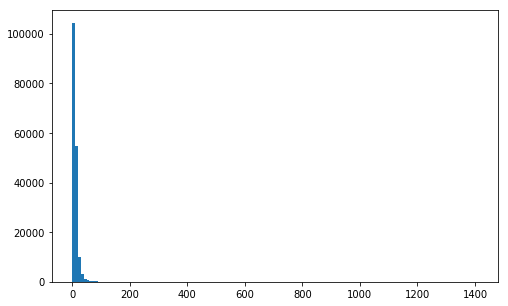

In [52]:
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df_clean, x = 'duration_min', bins=bins);

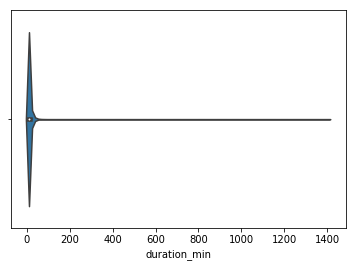

In [53]:
sb.violinplot(data = df_clean, x = 'duration_min');

**It's seems that most data are below 50. Let's find out the distribution.**

In [54]:
df_clean['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

**The data is not distributed normally. Let's calculate of IQR:** 
> - IQR = Q3 - Q1 = 14.416 - 5.766
> - Upper Wisker Bound = (1.5 * IQR) + Q3 = 12.975 + 14.416 = 27.391

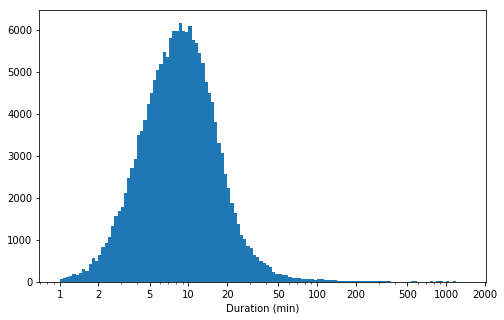

In [55]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');

**The distribution now looks closer to normal distribution. But, there is a long tail still. Let's remove the long tail.**

In [56]:
# Leave record with duration_min < 100 min
df_clean = df_clean[df_clean['duration_min'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174249 entries, 4 to 183411
Data columns (total 20 columns):
duration_sec               174249 non-null int64
start_time                 174249 non-null datetime64[ns]
end_time                   174249 non-null datetime64[ns]
start_station_id           174249 non-null float64
start_station_name         174249 non-null object
start_station_latitude     174249 non-null float64
start_station_longitude    174249 non-null float64
end_station_id             174249 non-null float64
end_station_name           174249 non-null object
end_station_latitude       174249 non-null float64
end_station_longitude      174249 non-null float64
bike_id                    174249 non-null int64
user_type                  174249 non-null object
member_birth_year          174249 non-null int64
member_gender              174249 non-null object
bike_share_for_all_trip    174249 non-null object
start_time_dayofweek       174249 non-null category
start_time_hour   

**Let's look at member age now.**

In [57]:
df_clean['member_age'].describe()

count    174249.000000
mean         34.191972
std          10.117930
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

**Note: max age is 141! Not usual.**

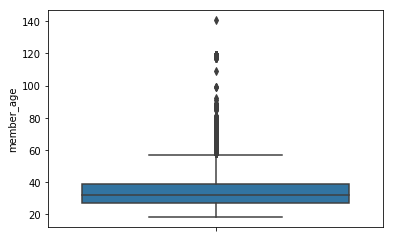

In [58]:
sb.boxplot(data = df_clean, y = 'member_age');

**The data is not distributed evenly. Let's calculate of IQR:** 
> - IQR = Q3 - Q1 = 39.0 - 27.0 = 12.0
> - Upper Wisker Bound = (1.5 * IQR) + Q3 = 18.0 + 39.0  = 57.0

In [59]:
# Let's remove outliners. Only keep record with member_age below 60.
df_clean = df_clean[df_clean['member_age'] <= 60]

In [60]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,45,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,60,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thu,23,36,19.116667
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,Thu,23,30,26.916667
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,Thu,23,31,26.166667


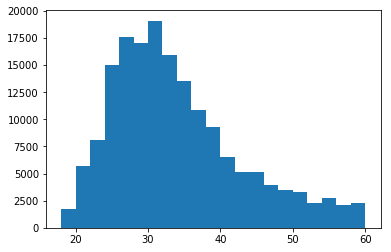

In [61]:
binsize = 2
bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins);

**Looks better now!**

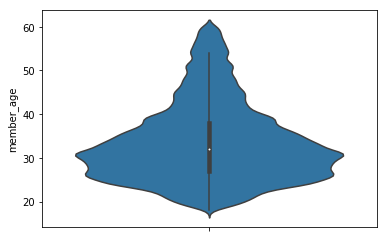

In [62]:
sb.violinplot(data = df_clean, y = 'member_age');

**The data is not distributed evenly. There are many bikers are around age 30. There are not that many bikers above age 40.** 

In [63]:
# save cleaned data 
df_clean.to_csv('clean_master_file.csv', index=False)

In [64]:
default_color = sb.color_palette()[0]

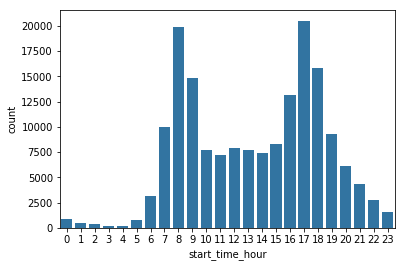

In [65]:
sb.countplot(data = df_clean, x = 'start_time_hour', color = default_color);

**8:00 AM and 5:00 PM are the two peak hours which have most bikers.**

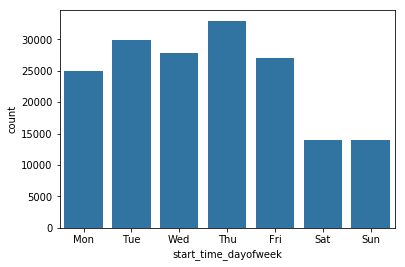

In [66]:
sb.countplot(data = df_clean, x = 'start_time_dayofweek', color = default_color);

**Tuesday has most bikers.**

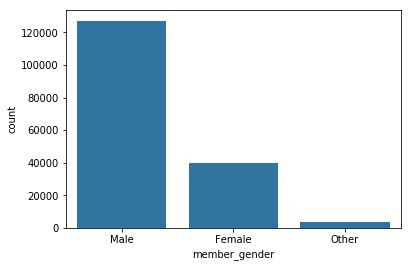

In [67]:
sb.countplot(data = df_clean, x = 'member_gender', color = default_color);

**Male bikers are about 3 times of female bikers.**

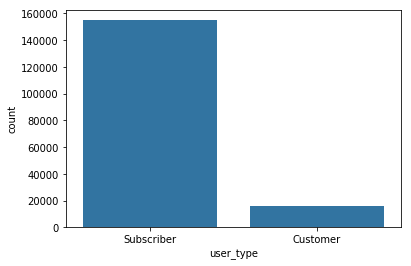

In [68]:
sb.countplot(data = df_clean, x = 'user_type', color = default_color);

**'Subscriber' user are more than 'Customer' user.** 

## Bivariate Exploration

In [69]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_min']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'member_gender', 'user_type']

**Although we will not investigate all the numeric variables, let's still look at for pairwise correlations which might present between numeric variables the data.**

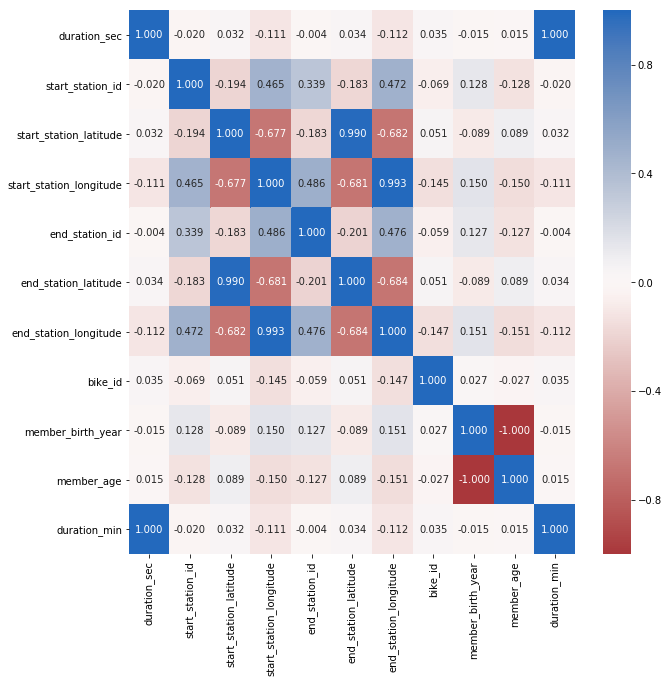

In [73]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(df_clean[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

**The correlation cofficients indicate there might be correlations between the following pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). However, there are no strong evidences to support these. So these might happen just by accident.** 

---

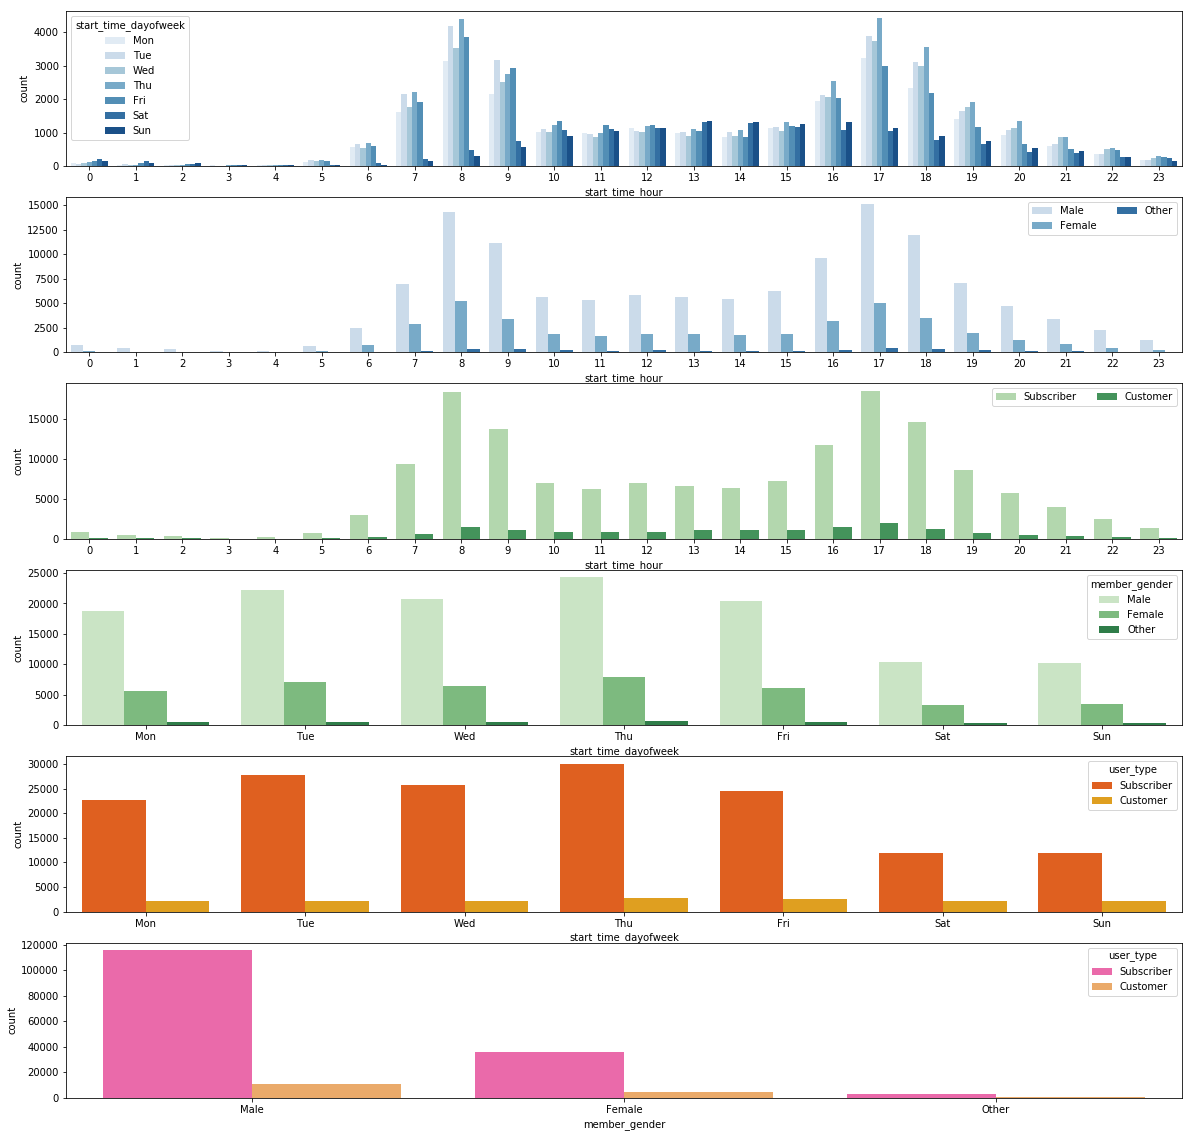

In [77]:
plt.figure(figsize = [20, 20]);


plt.subplot(6, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');


ax = plt.subplot(6, 1, 2);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(6, 1, 3);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(6, 1, 6);

sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type', palette = 'spring');

**Observations from above plots:**
> - Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
> - 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
> - 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
> - Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
> - Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
> - Most 'Subscriber' are male. Most 'Customer' bikers are also male.

---

**Let's make a plot with Log tranform on duration_min axis.**

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


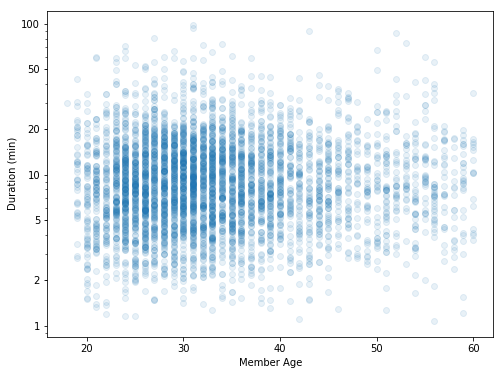

In [78]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(df_clean.shape[0], 5000, replace = False)
samp = df_clean.loc[samples,:]

plt.figure(figsize = [8, 6]);
plt.scatter(data = samp, x = 'member_age', y = 'duration_min', alpha = 1/10);
#plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

**Although we are still not seeing linear relationship between duration_min and member_age, the data looks distribute more even compared to the scatter plot drawn eariler.** 

In [79]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_min'] = df_clean['duration_min'].apply(log_trans)

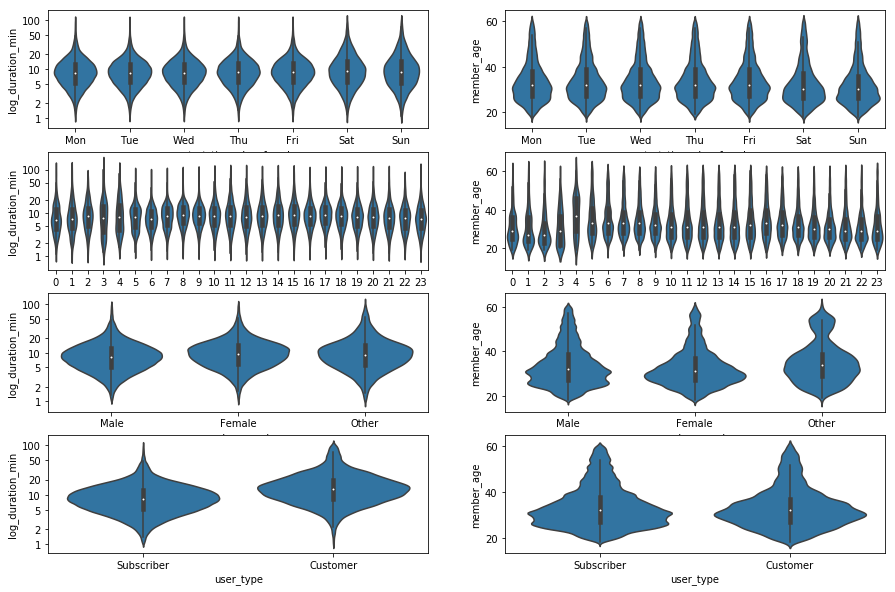

In [80]:
# plot the categorical variables against duration_min and member_age again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df_clean, x = var, y = 'log_duration_min', ax = ax[i,0], color = default_color);
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.violinplot(data = df_clean, x = var, y = 'member_age', ax = ax[i,1], color = default_color);

**Observations:**
> - The shapes of the violins in the plots on the left side (with 'log_duration_min' as y-axis) are more even compared to the shapes of the violins in the plots on the right side (with member_age as y-axis). The transformation make the violins on the left side looks more even.
> - Look at the plot on 1st row, 1st column: there are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
> - Look at the plot on 3rd row, 1st column: the mean bike duration for female biker is longer than the the mean duration of the male bikers.
> - Look at the plot on 4th row, 1st column: the mean bike duration for 'Customer' biker is longer than the the mean duration of the 'Subscriber' bikers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
> - Female bikers bike longer on average compared to male bikers.
> - Bikers with user_type 'Customer' bikes longer on average compared to bikers with user_type 'Subscriber'.
> - There are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
> - The mean bike duration for female biker is longer than the the mean duration of the male bikers.
> - The mean bike duration for 'Customer' biker is longer than the the mean duration of the 'Subscriber' bikers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Observations from above plots:

> - The mean age of bikers on Tuesday and Wednesday are higher than the mean age of bikers on other days.
> - The mean age of bikers on Sunday is lower than the mean age of bikers on other days.
> - The mean age of bikers who start between 6:00 AM to 7:00 AM is higher compared to the mean age of bikers who start at other time frames.
> - The mean age of male bikers is higher than the mean age of female bikers.
> - The mean age of bikers who are belong to 'Subscriber' type is higher than the mean age of bikers who are belong to 'Customer' type.
> - Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
> - 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
> - 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
> - Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
> - Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
> - Most 'Subscriber' are male. Most 'Customer' bikers are also male.

## Multivariate Exploration

**Let's devide bikers into 2 groups by age: 1 group has bikers below 40 years old, another group has bikers above 40 years old.**

In [100]:
age_flag1 = (df_clean['member_age'] < 40)
age_below_forty = df_clean.loc[age_flag1,:]

age_flag2 = (df_clean['member_age'] >= 40)
age_above_forty = df_clean.loc[age_flag2,:]

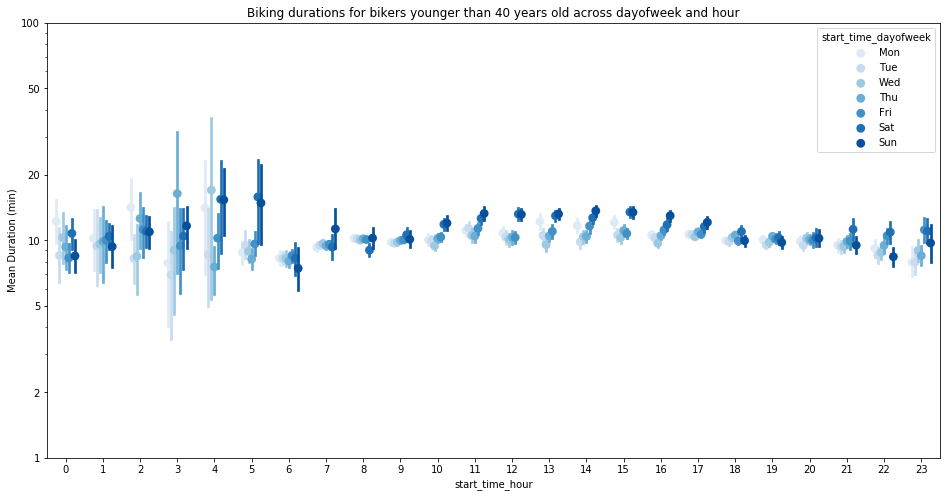

In [101]:
fig = plt.figure(figsize = [16,8])

ax = sb.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

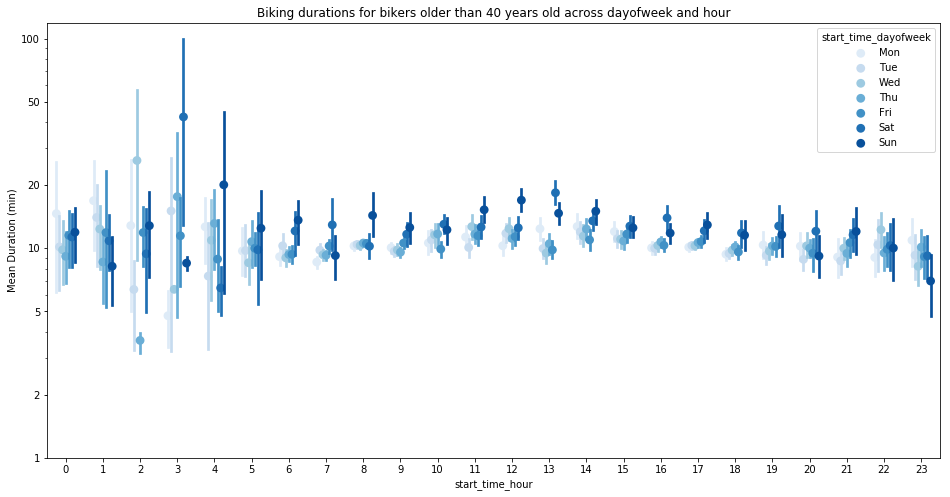

In [102]:
fig = plt.figure(figsize = [16,8])

ax = sb.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars in both pointplots, we can tell that there are more younger bikers (age < 40) across 7 days and 24 hours.
> - Bikers on Saturday and Sunday bike longer compared to bikers on other days.

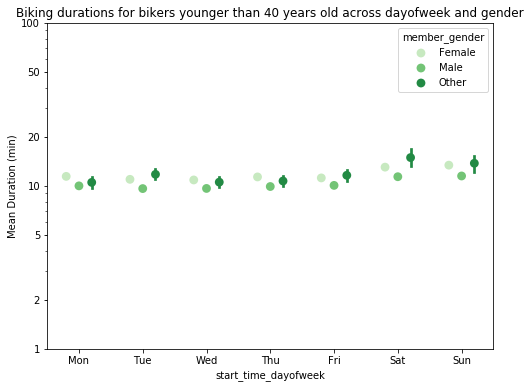

In [105]:
fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

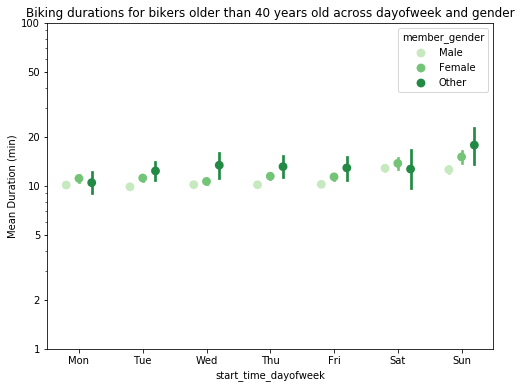

In [106]:
fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars (first plot, other bikers; second plot, female bikers and other bikers) in both pointplots, we can tell that there are less bikers who are older than 40 years old.
> - Female bikers bike longer than male bikers.

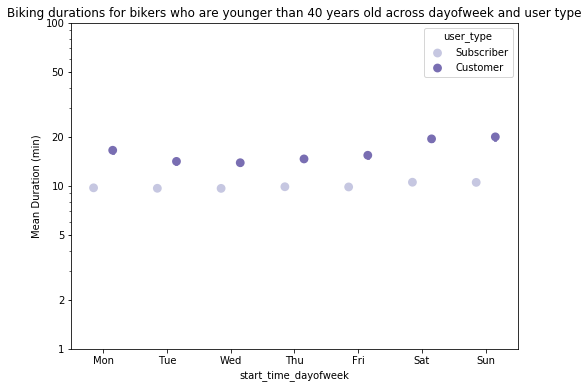

In [107]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are younger than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

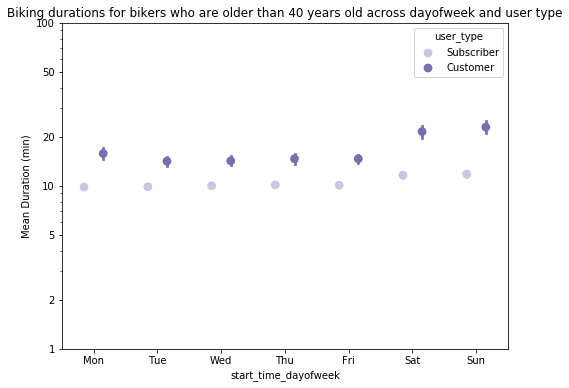

In [108]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are older than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

**Observations:**
> - By looking at the errorbars in both pointplots, we can tell that there are less bikers who are older than 40 years old.
> - 'Customer' bikers bike longer than 'Subscriber' bikers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> - The features we investigated here are pretty much indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest.

### Were there any interesting or surprising interactions between features?
> - Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
> - 4:00 AM has least bikers while 5:00 PM has the most bikers.
> - Female bikers bike longer on average compared to male bikers.
> - 'Customer' bikers bike longer on average compared to 'Subscriber' bikers.
> - The bikers are the least in 3:00 AM and 4:00 AM.
> - There are less bikers on Saturday and on Sundays on average.
> - There are more younger bikers (age < 40) across 7 days and 24 hours.